<a href="https://colab.research.google.com/github/adityasharma10699/Data_Mining/blob/main/Avg_Tempreture_PCA%2BKMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [79]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Class work/Week 8 and later/Avg_Temperatures.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Regions    93 non-null     object 
 1   April      93 non-null     float64
 2   August     93 non-null     float64
 3   December   93 non-null     float64
 4   February   93 non-null     float64
 5   January    93 non-null     float64
 6   July       93 non-null     float64
 7   June       93 non-null     float64
 8   March      93 non-null     float64
 9   May        93 non-null     float64
 10  November   93 non-null     float64
 11  October    93 non-null     float64
 12  September  93 non-null     float64
dtypes: float64(12), object(1)
memory usage: 9.6+ KB


In [81]:
df

,Regions,April,August,December,February,January,July,June,March,May,November,October,September
0,Ain,12.29,19.03,5.95,2.93,5.35,20.84,18.54,6.87,13.82,7.47,11.92,15.93
1,Aisne,13.35,21.57,11.12,9.29,8.57,21.50,20.76,10.78,15.26,12.62,16.51,19.75
2,Allier,17.99,25.19,8.72,6.64,9.09,26.38,26.19,12.22,20.92,11.48,19.51,22.47
3,Alpes-de-Haute-Provence,11.99,20.20,6.69,3.90,6.18,21.09,18.29,7.61,13.31,8.32,11.90,16.58
4,Alpes-Maritimes,12.08,23.63,7.48,7.42,5.65,23.73,21.63,8.61,16.06,10.44,14.59,21.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Vendee,11.88,17.54,10.38,8.19,7.74,18.52,16.58,9.61,14.11,11.41,15.54,17.84
89,Vienne,14.16,20.91,12.97,11.33,12.05,23.60,21.09,13.37,16.01,11.76,18.55,21.39
90,Vosges,10.85,18.98,5.24,3.01,4.98,20.29,19.48,6.90,14.36,6.00,12.53,14.90
91,Yonne,15.03,25.25,8.92,8.75,8.29,28.31,23.29,13.04,18.81,11.73,18.18,22.56


In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Regions'] = digits
df['Regions'] = le.fit_transform(df['Regions'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Regions    93 non-null     int64  
 1   April      93 non-null     float64
 2   August     93 non-null     float64
 3   December   93 non-null     float64
 4   February   93 non-null     float64
 5   January    93 non-null     float64
 6   July       93 non-null     float64
 7   June       93 non-null     float64
 8   March      93 non-null     float64
 9   May        93 non-null     float64
 10  November   93 non-null     float64
 11  October    93 non-null     float64
 12  September  93 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 9.6 KB


In [84]:
X = df.drop(columns = ['Regions'])
y = df['Regions']

In [85]:
# # Creating the two dimensional 'Moons' dataset
# X,y = make_moons(n_samples = 200, random_state = 100) # X = two dimensions, Y = label
# print(X[:5,])

In [86]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [87]:
# # Implementing K Means Clustering
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(X_scaled)
# plt.figure(figsize = (8,6))
# plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='plasma')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()


In [88]:
# Select only the temperature columns for clustering
X = df.drop(columns = ['Regions'])
print(X)

    April  August  December  February  January   July   June  March    May  \
0   12.29   19.03      5.95      2.93     5.35  20.84  18.54   6.87  13.82   
1   13.35   21.57     11.12      9.29     8.57  21.50  20.76  10.78  15.26   
2   17.99   25.19      8.72      6.64     9.09  26.38  26.19  12.22  20.92   
3   11.99   20.20      6.69      3.90     6.18  21.09  18.29   7.61  13.31   
4   12.08   23.63      7.48      7.42     5.65  23.73  21.63   8.61  16.06   
..    ...     ...       ...       ...      ...    ...    ...    ...    ...   
88  11.88   17.54     10.38      8.19     7.74  18.52  16.58   9.61  14.11   
89  14.16   20.91     12.97     11.33    12.05  23.60  21.09  13.37  16.01   
90  10.85   18.98      5.24      3.01     4.98  20.29  19.48   6.90  14.36   
91  15.03   25.25      8.92      8.75     8.29  28.31  23.29  13.04  18.81   
92  12.85   21.54     11.96      8.41    10.79  23.05  22.11  13.04  17.15   

    November  October  September  
0       7.47    11.92      1

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [90]:
# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

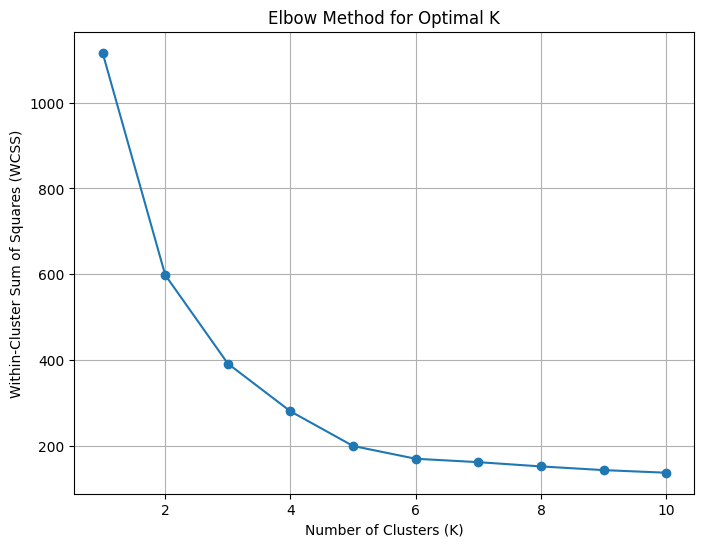

In [91]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


In [92]:
# From the graph, select the optimal K (number of clusters)
# Let's say K = 3 for demonstration purposes

# Apply K-Means clustering with K = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

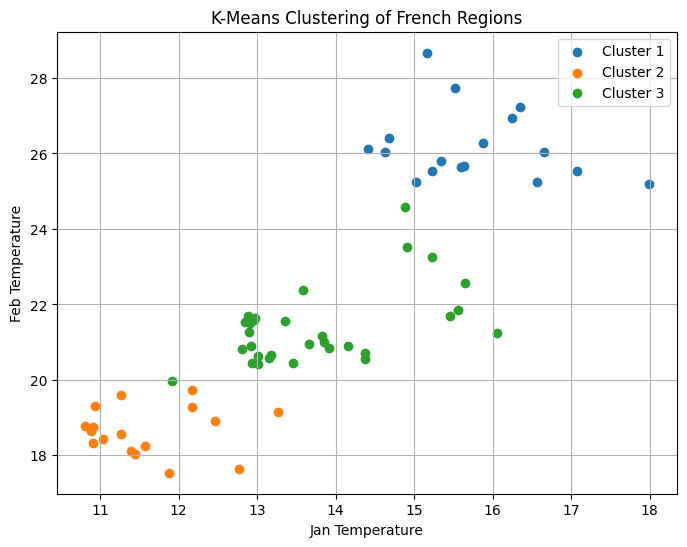

In [93]:

# Visualize the clustered regions
plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {cluster_id + 1}')

plt.xlabel('Jan Temperature')
plt.ylabel('Feb Temperature')
plt.title('K-Means Clustering of French Regions')
plt.legend()
plt.grid()
plt.show()

In [99]:
# as there are 12 months we can apply PCA to bring 12 dimensions to just two and then make clusters
# # Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

digits=list(df['Regions'])
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color= df['Regions'], colorscale='Rainbow', opacity=0.5),
                                text=[f'digit: {a}' for a in digits],
                                hoverinfo='text')]

layout = go.Layout(title = 'Data with Original Labels', width = 500, height = 500,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()


Variance explained by each of the n_components:  [0.63551772 0.23651075]
Total variance explained by the n_components:  0.8720284679265535


In [95]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_pca)
labels=list(kmeans.labels_)
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'label: {a}' for a in labels],
                                hoverinfo='text')]

layout = go.Layout(title = 'Data with KMeans Labels', width = 500, height = 500,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()


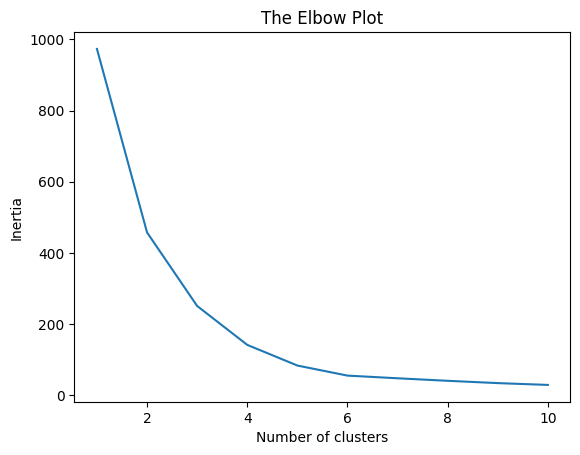

In [96]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()